<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>

$ \ $ 

----

## ***Instructions***

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage (aprovechar) a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

$ \ $

The grading will center around 5 main points:

$ \ $

$(1)$  Does the report include a section describing the data?

$ \ $

$(2)$  Does the report include a paragraph detailing the main objective(s) of this analysis?

$ \ $

$(3)$  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.

$ \ $

$(4)$  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?

$ \ $

$(5)$  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


$ \ $

-----

## ***Import the required libraries***

The following required modules are pre-installed in the Skills Network Labs environment. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

$ \ $

---

## ***Importing the Dataset***

Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm (idea genial) with your peers about great public data sets using the discussion board in this module.

$ \ $

Read your chosen dataset into pandas dataframe.



In [ ]:
data = pd.read_csv('Ames_Housing_Sales.csv')
data.head(15)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,None,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,None,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,None,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,None,2,1Fam,None,None,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,None,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [ ]:
data["RoofMatl"].value_counts()

CompShg    1354
Tar&Grv      10
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

$ \ $ 

----

## ***Deliverables***

Once you have selected a data set, you will produce the deliverables (entregables) listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

$ \ $

$\color{yellow}{(1)}$ Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

> We will be working with a data set based on ***housing prices in Ames, Iowa***. We will try to study the sales price of houses in Iowa, considering this feature as the trait to predict and we will see how other dataframe traits can help predict the behavior of our feature to predict ("SalePrice").

$ \ $

$\color{yellow}{(2)}$  Brief description of the data set you chose and a summary of its attributes.

$ \ $

> $(a)$ Our data has the following attributes:

In [ ]:
data.columns 

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

$ \ $


* ***`'1stFlrSF'`*** : first floor square footage.

* ***`'2ndFlrSF'`*** : second floor square footage.

* ***`'3SsnPorch'`*** : A 3-season porch has windows with integrated screen systems and can be used for long periods throughout the year. They can shield you from outdoor elements such as rain, wind, sun and insects, but 3-season porches are not heated.
 
* ***`'Alley'`*** : It is a boolean value. It is true if the house has an alley, and it is false in contrary case.

* ***`'BedroomAbvGr'`*** : This is the number of bedrooms.

* ***`'BldgType'`*** : This is the building type, and it specifies the number of families that could live in this house.

* ***`'BsmtCond'`*** : Basement Condition.

* ***`'BsmtExposure'`*** : Basement exposure.

* ***`'BsmtFinSF1'`*** : Basement feature.

* ***`'BsmtFinSF2'`*** : Basement feature.

* ***`'BsmtFinType1'`*** : Basement feature. 

* ***`'BsmtFinType2'`*** : Basement feature. 

* ***`'BsmtFullBath'`*** : Basement full bath.

* ***`'BsmtHalfBath'`*** : Basement half Bath.

* ***`'BsmtQual'`*** : Basement qual.

* ***`'BsmtUnfSF'`*** : Basement unifiqued sex family.

* ***`'CentralAir'`*** : Central air conditioning.

* ***`'Condition1'`*** : Condition.

* ***`'Condition2'`*** : Condition.

* ***`'Electrical'`*** : Electrical.

* ***`'EnclosedPorch'`*** : Enclosed Porch.

* ***`'ExterCond'`*** : Exterior Condition.

* ***`'ExterQual'`*** : Exterior Qual.

* ***`'Exterior1st'`*** : First floor exterior.

* ***`'Exterior2nd'`*** : Second floor exterior.

* ***`'Fence'`*** : Close to some interesting place.

* ***`'FireplaceQu'`*** : Fireplace.

* ***`'Fireplaces'`*** : quantity of fireplaces.

* ***`'Foundation'`*** : construction material.

* ***`'FullBath'`*** : Full Bath.

* ***`'Functional'`*** : Functional.

* ***`'GarageArea'`*** : Garage Area.

* ***`'GarageCars'`*** : Garage Cars.

* ***`'GarageCond'`*** : Garage Condition.

* ***`'GarageFinish'`*** : Garage Finish.

* ***`'GarageQual'`*** : Garage Quality.

* ***`'GarageType'`*** : Garage Type.

* ***`'GarageYrBlt'`*** : Year of construction of the garage.

* ***`'GrLivArea'`*** : Garage Living Area.

* ***`'HalfBath'`*** : Half Bath.

* ***`'Heating'`*** : Heating.

* ***`'HeatingQC'`*** : Heating quality control.

* ***`'HouseStyle'`*** : House Style.

* ***`'KitchenAbvGr'`*** : Number of kitchens.

* ***`'KitchenQual'`*** : Kitchen quality.

* ***`'LandContour'`*** : Land Contour.

* ***`'LandSlope'`*** : Land Slope.

* ***`'LotArea'`*** : Lot Area.

* ***`'LotConfig'`*** : Lot Configuration.

* ***`'LotFrontage'`*** : Lot Frontage.

* ***`'LotShape'`*** : Lot Shape.

* ***`'LowQualFinSF'`*** : Low qual financial.

* ***`'MSSubClass'`*** : It specifies the type of dwelling involved in the sale. 

* ***`'MSZoning'`*** : Zone classification.

* ***`'MasVnrArea'`*** : Masonry veneer area in square feet.

* ***`'MasVnrType'`*** : Type of masonry coating.

* ***`'MiscFeature'`*** :  Miscellaneous feature not covered in other categories.

* ***`'MiscVal'`*** : Miscellaneous values.

* ***`'Neighborhood'`*** : Neighborhood.

* ***`'OpenPorchSF'`*** : Open porche.

* ***`'OverallCond'`*** : Overall Conditions.

* ***`'OverallQual'`*** : Overall Qual.

* ***`'PavedDrive'`*** : Paved Drive.

* ***`'PoolArea'`*** : Pool Area.

* ***`'PoolQC'`*** : Pool quality control.

* ***`'RoofMatl'`*** : Roof Material.

* ***`'RoofStyle'`*** : Roof Style.

* ***`'SaleCondition'`*** : Sale Condition.

* ***`'SaleType'`*** : Sale Type.

* ***`'ScreenPorch'`*** : Screen Porch.

* ***`'Street'`*** : Street.

* ***`'TotRmsAbvGrd'`*** : Total rooms above ground level.

* ***`'TotalBsmtSF'`*** : Total square footage of basement.

* ***`'Utilities'`*** : Utilities.

* ***`'WoodDeckSF'`*** : Wood Deck.

* ***`'YearBuilt'`*** : Years Built.

* ***`'YearRemodAdd'`*** : Year Remodel Added.

* ***`'YrSold'`*** : Years sold.

* ***`'SalePrice'`*** : Sale Price.

$ \ $

$(b)$ We describe the data categorical features.

In [ ]:
mask = (data.dtypes == np.object)
categorical_cols = data.columns[mask]
data_cat = data[categorical_cols] 
data_cat

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,None,1Fam,None,None,None,None,None,Y,Norm,Norm,...,None,Gilbert,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1375,None,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,None,NWAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1376,None,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,Shed,Crawfor,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1377,None,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,None,NAmes,Y,None,CompShg,Hip,Normal,WD,Pave,AllPub


$ \ $

$(c)$ We describe the data numerical features.

In [ ]:
data_num = data.drop(categorical_cols, axis=1)
data_num

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


$ \ $

$\color{yellow}{(3)}$   Brief summary of data exploration and actions taken for data cleaning and feature engineering.

$ \ $

$(a)$ We show the correlation between "SalePrice" and the numerical features.

In [ ]:
correlation = data_num.corr() 

<Axes: >

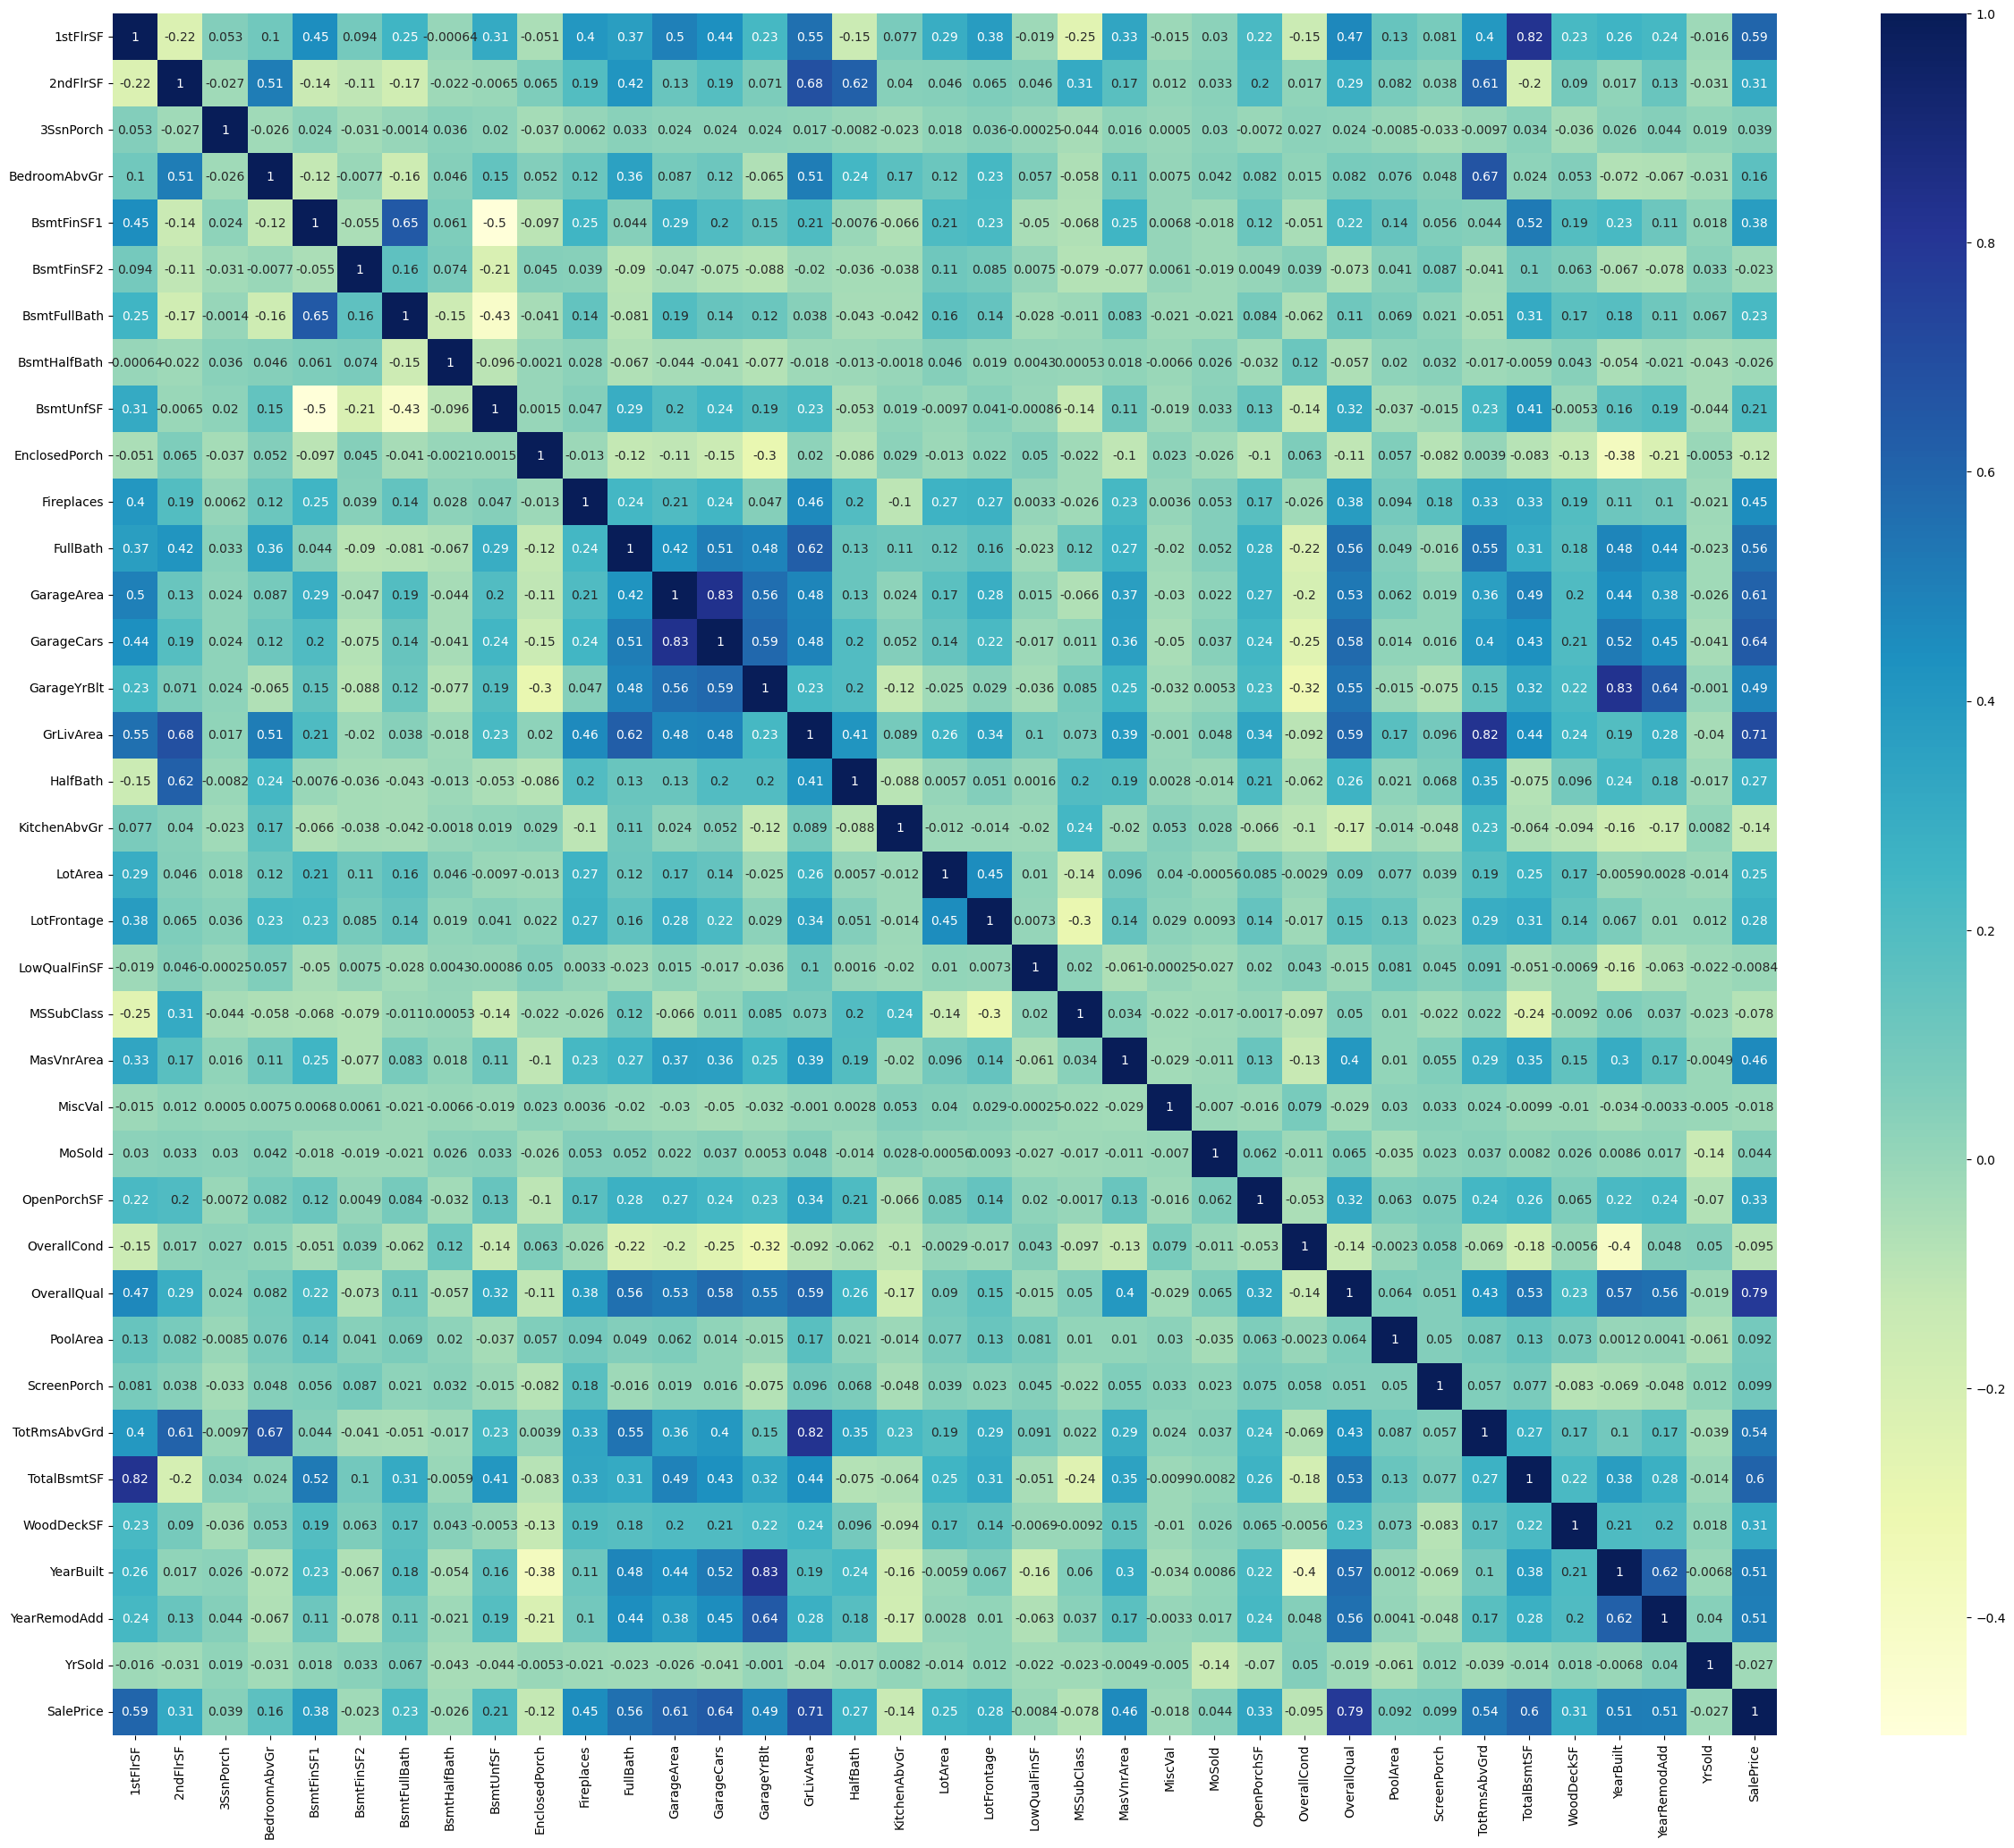

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(correlation, annot = True, cmap="YlGnBu")

In [ ]:
sale_price_corr = correlation[["SalePrice"]]
sale_price_corr.sort_values(by = ['SalePrice'], ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.787228
GrLivArea,0.708172
GarageCars,0.637095
GarageArea,0.608405
TotalBsmtSF,0.603583
1stFlrSF,0.594935
FullBath,0.556550
TotRmsAbvGrd,0.538309
YearBuilt,0.507584


$ \ $

$(b)$  Let's look a Statistical Analysis about the numerical features.

In [ ]:
data_num.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


$ \ $ 

$(c)$ We perform one-hot encoding.

In [ ]:
# we describe the columns of the original dataframe
col = list(data_cat.columns)

# we perform one hot encoding on the dataframe
one_hot_encoded_data = pd.get_dummies(data, columns = col)

# we get the columns names of the categorical data
names = list(set(one_hot_encoded_data.columns)-set(data_num.columns))

# we delete the first part of the name of the columns affected by the one hot encoding.
column_names = []
for name in names:
  number_1 = name.find("_")+1
  name = name[number_1: ]
  column_names.append(name)

# We create a dictionary to change the column names
diccionario = {}
for i in range(len(names)):
  diccionario[names[i]] = column_names[i]

# We update the column names of the dataframe
one_hot_encoded_data.rename(columns = diccionario, inplace = True)
new_data = one_hot_encoded_data
new_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLD,ConLI,ConLw,New,Oth,WD,Grvl,Pave,AllPub,NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0,0,0,0,0,1,0,1,1,0


$ \ $

$\color{yellow}{(4)}$   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits.

$ \ $

$(a)$ We can split the data into the features `X` and target `y`.

In [ ]:
X = new_data.drop("SalePrice", axis = 1)
y = new_data[["SalePrice"]].copy()

$ \ $

$(b)$ We create a ***`StandardScaler()`*** object and a ***`PolynomialFeatures`*** object.





In [ ]:
s = StandardScaler()
pf = PolynomialFeatures(degree = 2, include_bias = False) 

$ \ $

$(c)$ We create some linear models.

In [ ]:
lr = LinearRegression()
las = Lasso()
r = Ridge() 

$  \ $

$(d)$ We calculate the $R^2$ score for the linear models. In this process, we will use the ***`StandardScaler()`*** object and a ***`PolynomialFeatures`*** object.

In [ ]:
# we generate a new feature of all polynomial combinations of the feature and later we scale the data.
X_pf = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)


# We scale our data.
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [ ]:
# we train our Linear regression model.

lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test)
y_pred_s = lr.predict(X_test_s)

In [ ]:
# we train our Lasso regression model.

las.fit(X_train_s, y_train)
y_pred_las = las.predict(X_test_s)

In [ ]:
# we train our Ridge regression model.

r.fit(X_train_s, y_train)
y_pred_rs = r.predict(X_test_s)

In [ ]:
print("R^2 score for Linear Regression:", r2_score(y_pred_s, y_test), "\n")
print("R^2 score for Lasso Regression:", r2_score(y_pred_las, y_test), "\n")
print("R^2 score for Ridge Regression:", r2_score(y_pred_rs, y_test), "\n")

R^2 score for Linear Regression: 0.8572076740095704 

R^2 score for Lasso Regression: 0.8149432728562838 

R^2 score for Ridge Regression: 0.8610278462964773 



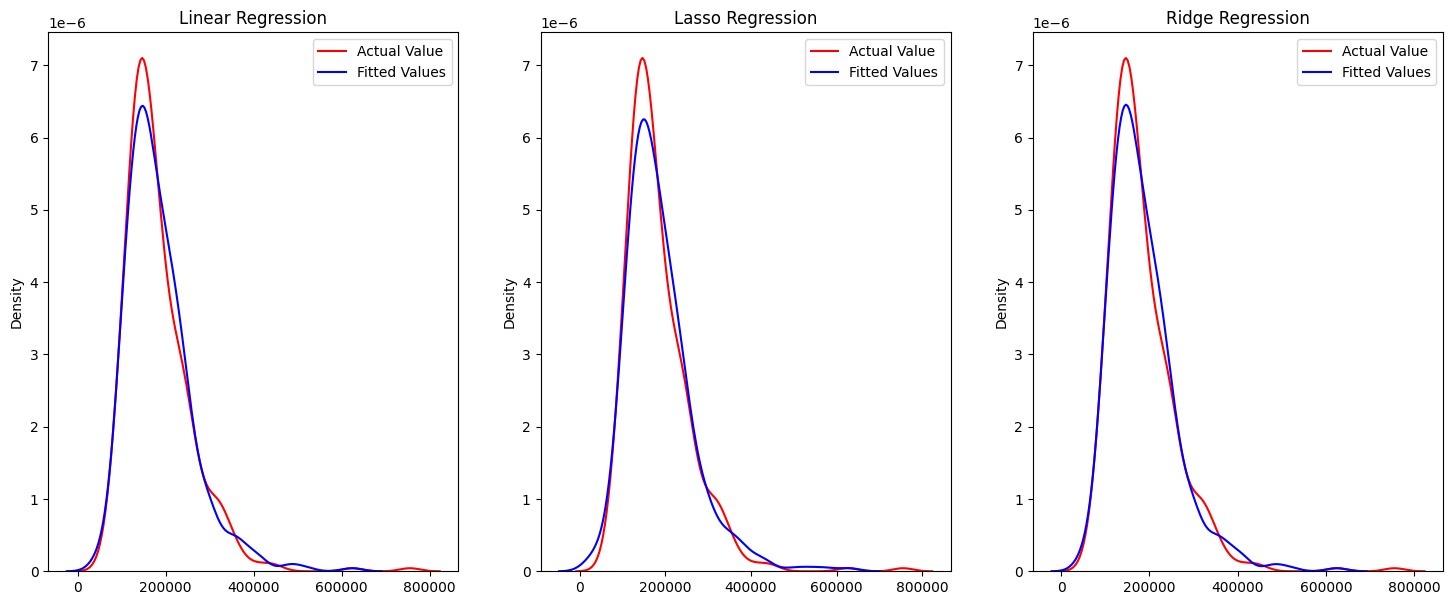

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (18, 7))


sns.distplot(y_test, hist = False, color="r", label = "Actual Value",  ax = ax1)
sns.distplot(y_pred_s, hist = False, color = "b", label = "Fitted Values" , ax = ax1)
ax1.set_title('Linear Regression')
ax1.legend()


sns.distplot(y_test, hist = False, color="r", label = "Actual Value",  ax = ax2)
sns.distplot(y_pred_las, hist = False, color = "b", label = "Fitted Values" , ax = ax2)
ax2.set_title('Lasso Regression')
ax2.legend()


sns.distplot(y_test, hist = False, color="r", label = "Actual Value",  ax = ax3)
sns.distplot(y_pred_rs, hist = False, color = "b", label = "Fitted Values" , ax = ax3)
ax3.set_title('Ridge Regression')
ax3.legend()

$ \ $

$\color{yellow}{(5)}$   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

$ \ $

Taking into account the results shown above, I would choose the RIDGE regression model. However, it is worth noting that the results obtained with the different regression models are quite similar, which makes the choice of the RIDGE model somewhat risky.

$ \ $

$\color{yellow}{(6)}$   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

$ \ $

We saw that the linear regression models yield very similar results using the coefficient of determination $R^2$ that provides information about the goodness of fit of a model.

$ \ $

$\color{yellow}{(7)}$    Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

$ \ $ 


One suggestion that can help make linear regression models more optimal is to reduce the number of predictor variables. We can do this, determining which predictor variables are more related to the variable to predict "SalePrice", and to determine we could do the following things:

$ \ $

* $(a)$ Perform a visualization of the relationship between the predictor features and the trait to be predicted "SalePrice".

$ \ $

* $(b)$ Determining the correlation between the predictor feature and the  predicted feature "SalePrice".

$ \ $

* $(c)$ Using $(1)$ and $(2)$, we determine the possible traits that are most related to the predicted feature "SalePrice". And these features will be the ones we will use


$ \ $

$(a)$ We use the ***`pairplot()`*** function to display the scatter plots of the relationships between the numerical features of the dataframe ***`data`***.


In [ ]:
sns.pairplot(data_num) 

Output hidden; open in https://colab.research.google.com to view.


$ \ $

$(b)$ We show the correlation between "SalePrice" and the numerical features, and later we compare these results with the previous pairplot to get the predictor variables that are most related to the variable to predict called "SalePrice".

In [ ]:
data_num.corr()[["SalePrice"]].sort_values(by = ['SalePrice'], ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.787228
GrLivArea,0.708172
GarageCars,0.637095
GarageArea,0.608405
TotalBsmtSF,0.603583
1stFlrSF,0.594935
FullBath,0.556550
TotRmsAbvGrd,0.538309
YearBuilt,0.507584


We can notice from the above that several of the predictor variables of numerical type have a high correlation with the variable to be predicted, but their scatterplot does not demonstrate this correlation. This is because, sometimes, correlation does not imply causation.